# CSI4142 - Group 48 - Assignment 1

---

## Introduction
This report analyzes two datasets in distinct domains, to uncover valuable insights and tell compelling stories derived from the datasets. 

By presenting these findings through a combination of visualizations and actionable insights, this report aims to provide a comprehensive understanding of the patterns and trends within each dataset. The ultimate goal is to present the data in a way that highlights critical details not immediately apparent, offering a deeper perspective on each dataset's significance.

The target audience for this report includes individuals or organizations interested in data-driven decision-making, such as public health or medical professionals, urban planners, policymakers, and general data enthusiasts. Whether the reader possesses advanced data science knowledge or is entirely new to the field, this report is designed to be accessible and engaging, with clear visuals and concise explanations that make the information easy to understand and interpret.


#### Group 48 Members
- Ali Bhangu - 300234254
- Justin Wang - 300234186


In [4]:
# Importing the required Python libraries
import numpy as npy
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os 

---

# Dataset #1 - Heart Failure Prediction 

### Dataset Description
- Name: Heart Failure Prediction
- Purpose: The purpose of this data set is to predict a possible heart disease. As the author notes, cardiovascular diseases account for 31% of deaths worldwide.
- Author: fedesoriano
- Shape: 12 Columns, 918 Rows


#### Dataset Features
- Age: Numerical | The age of patients in years
- Sex: Categorial | Sex of the Patient
- ChestPainType: Categorical | Different Chest Pain Types Ex: TA: Typical Angina, ATA; Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
- RestingBP: Numerical | Resting BP Measured in mm HG
- Cholesterol: Numerical | Serum Cholesterol
- FastingBS: Categorical | If the Blood Sugar > 120mg then 1, Otherwise 0
- RestingECG: Categorical | With Normal, ST, LVH as the options
- MaxHR: Numerical | Value between 60 and 202
- ExerciseAngina: Categorical | Yes or No -> Exercise Induced Angina
- Oldpeak: Numerical | Numerical Value For ST
- ST_Slope: Categorical | Up, Flat, or Down
- HeartDisease: Categorical | 1 if They Have It & 0 If Not


#### Redundancy or Missing Features
For this data set, we have noticed a missing value with the RestingBP category, as it is not specified whether it is the Systolic blood pressure or Diastolic blood pressure with the value given. \


Also, some of the rows have 0 cholesterol levels which is impossible in the human body. Could indicate that this info was not available

#### Requirements for Dataset 1 Code : 
Run the below code to download the dataset, it uses a cURL command to download the dataset directly from Kaggle. 

In [10]:
#!/bin/bash
!curl -L -o heart-failure-prediction.zip \https://www.kaggle.com/api/v1/datasets/download/fedesoriano/heart-failure-prediction && unzip heart-failure-prediction.zip 

# Check if the CSV file exists, otherwise raise an error
csv_path = "heart.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Dataset not found: {csv_path}. Ensure the file is downloaded and extracted.")

# Loading in the dataset
heartSet = pd.read_csv(csv_path)
heartSet.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8762  100  8762    0     0  25873      0 --:--:-- --:--:-- --:--:--  109k
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


---

## Insight 1 - Majority of the People in this Dataset have Borderline to High Cholesterol:


This insight showcases a simple histogram for the visualization of the cholesterol dispersion amongst adults in this data set. This insight showcases that the majority of people in this dataset have a cholesterol higher than 200, meaning that a majority of the people have borderline to high cholesterol.


- Normal: < 200 mg/dL
- Borderline High Cholesterol (at-risk): 200 to 239 mg/dL
- High Cholesterol: 240 or higher mg/dL \
Source: https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean


<br>


#### Visual for Insight 1


![Insight 1](./DataSet%20Images/DataSet1_Insight1.png)


<br>
This fulfils the Univariate R1 requirement for numerical data. This evidence was obtained by using the code labeled with the comment "Code for Insight 1".

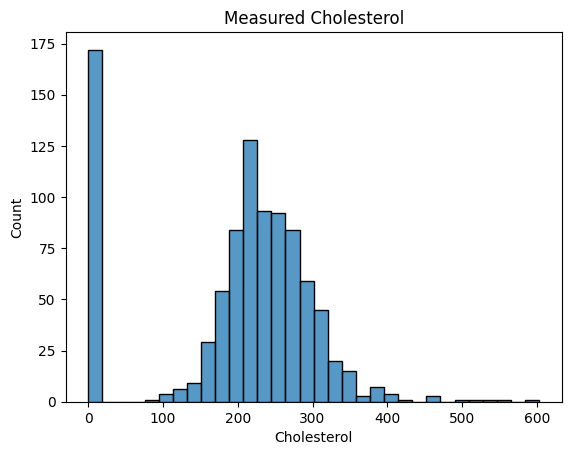

In [11]:
#Code for Insight 1: 

# Creating the graph
sns.histplot(data=heartSet, x="Cholesterol")
plt.title("Measured Cholesterol")

# Display the plot
plt.show()

---

## Insight 2 - The majority of individuals in the dataset have a flat ST slope, while a significantly smaller proportion exhibit a down-sloping ST slope.


The count plot illustrates the distribution of individuals based on their ST slope types (Up, Flat, Down). The x-axis categorizes the ST slope, and the y-axis represents the count of individuals. From the graph: Flat ST slope has the highest count, followed by Up-sloping. Down-sloping ST slope has a minimal count, indicating it is the least common occurrence.


This count plot is important because the ST Slope provides a snapshot of heart health, with flat and downward slopes often indicating potential cardiac issues. A flat ST slope is associated with myocardial ischemia (reduced blood flow to the heart), while a downward ST slope is particularly concerning as it may suggest severe heart conditions such as complete artery clogging.


#### Visual for Insight 2


![insight 2](./DataSet%20Images/DataSet1_Insight2.png)


<br>
This was univariate analysis, which fulfils the requirement for r2, as this is a countplot for a category with multiple values focused on Categorical Data.


This evidence was obtained by using the code labeled with the comment "Code for Insight 2".

In [ ]:
#Code for Insight 2 -> Creating the Countplot

#Creating a count plot from the dataset variable called heartSet and x=ST Slope 
sns.countplot(data=heartSet, x='ST_Slope')
# Setting the X Label 
plt.xlabel("ST Slope (Heart Health Indicator)")
# Setting the Title Label 
plt.title("Distribution of ST Slope Types")
# Setting the Y Label 
plt.ylabel("Count of Persons")

# Displaying the Graph 
plt.show()


## Insight 3 - Patients experiencing 'Unstable' types of chest pain are more likely to have heart disease compared to those with 'Stable' chest pain.

The countplot illustrates the distribution of heart disease between 'Stable' and 'Unstable' chest pain groups. The 'Unstable' group, which includes symptoms like ASY (Asymptomatic) and TA (Typical Angina), shows a significantly higher chance of heart disease compared to the 'Stable' group (ATA () and NAP). This visualization underscores the importance of chest pain type as an indicator of potential heart issues, with 'Unstable' pains linked to more severe conditions.


#### Visual for Insight 3
![Image](./DataSet%20Images/DataSet1_Insight3.png)

This analysis, categorized as r3 (Grouped-Data countplot), reveals the critical role of chest pain classification in predicting heart disease risk, emphasizing targeted clinical attention for 'Unstable' symptoms.

This evidence was obtained by using the code labeled with the comment "Code for Insight 3". 

In [ ]:
#Code for Insight 3 

# Grouping Chest Pain Grouped

# Replacing the different types of chest pain types into Stable or Unstable, a thorough explanation can be found in our insight above. 
heartSet['ChestPainGrouped'] = heartSet['ChestPainType'].replace({
    'ATA': 'Stable', 
    'NAP': 'Stable', 
    'ASY': 'Unstable', 
    'TA': 'Unstable',
    })

# Setting the graph size 
plt.figure(figsize=(10, 6))

# Setting up a Count Plot with a neat colour palette
sns.countplot(x='ChestPainGrouped', hue='HeartDisease', data=heartSet, palette='viridis')

# Adding the title, xlabel, and ylabel  
plt.title('Distribution of Heart Disease by Grouped Chest Pain Type')
plt.xlabel('Grouped Chest Pain Type')
plt.ylabel('Count')

# Adding a grid and legend to make the graph look neater 
plt.grid(axis='y')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


---

## Insight 4 - There are double the amount of men with heart disease than without


The evidence for this is a grouped-data countplot graph. The x-axis represents the 2 sexes labelled in the dataset, Male and Female. The y-axis represents the amount of people with or without heart disease. The blue bar represents people without heart disease and the orange bar represents people with heart disease.


This insight showcases an r4 bivariate analysis which groups the gender and heart disease values. The 2 bars combined equal the total amount of men and women that appear in the dataset. This graph shows that more men have heart disease than women, there are double the amount of men with heart disease than without, triple the amount of women without heart disease than with, and ten times the amount of men with heart disease than women.

#### Visual for Insight 4
![Insight 4](./DataSet%20Images/DataSet1_Insight4.png)


This evidence was obtained by using the code labeled with the comment "Code for Insight 4".

In [ ]:
# Code for Insight 4

# Creating a countplot
sns.countplot(data=heartSet, x="Sex", hue="HeartDisease")
plt.title("Presence of Heart Disease in Men and Women ")
plt.xlabel("Patient's Sex", fontsize=12)
plt.ylabel("Count of Patients" , fontsize=12)

# Showing the graph 
plt.grid(axis='y')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

---

## Insight 5 - People with normal resting electrocardiogram (ECG) have more healthier max heart rates.


The evidence for this is a grouped-data countplot graph. The x-axis represents the different types of resting ECGs labelled in the dataset, normal, ST and LVH. The y-axis represents the amount of people of different max heart rates. The blue bar represents 0-75 HR, orange bar represents 76-100 HR, green bar represents 101-125 HR, red bar represents 126-150 HR, purple bar represents 151-175 HR, and brown bar represents 176-200 HR.


This insight showcases an r5 bivariate analysis which groups the resting ECG and MaxHR values. The values were aligned with in ascending numerical order.


#### Visual for Insight 5
![Insight 5](./DataSet%20Images/DataSet1_Insight5.png)


This evidence was obtained by using the code labeled with the comment "Code for Insight 5".

In [ ]:
# Code for Insight 5

# Adjust the figure size for better visibility
plt.figure(figsize=(10, 6))
bins = [0, 75, 100, 125, 150, 175, 200]
labels = ['0-75', '76-100', '101-125', '126-150', '151-175', '176-200']
heartSet['MaxHR_Group'] = pd.cut(heartSet['MaxHR'], bins=bins, labels=labels, right=True)

# Create a countplot with original bins for MaxHR as the hue and improved aesthetics
sns.countplot(
    data=heartSet,
    x="RestingECG",
    hue="MaxHR_Group",  # Use the defined bins without additional grouping
    linewidth=2,  # Thicker lines for bars
    palette="tab10"  # Distinct colors for each range
)

# Enhance the plot with a title and axis labels
plt.title("Resting ECG Types by MaxHR Range", fontsize=16)
plt.xlabel("Resting ECG Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot with a legend
plt.legend(title="MaxHR Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



---

## Insight 6 - Age Correlates with Increased Resting Blood Pressure


The scatter plot analysis suggests that resting blood pressure increases with age. This insight is crucial as it aligns with the known trend that older individuals often have higher blood pressures, which could elevate the risk of cardiovascular diseases.

#### Visual for Insight 6
![Insight 6](./DataSet%20Images/DataSet1-Insight6.png)

This evidence was obtained by using the code labeled with the comment "Code for Insight 6".

In [ ]:
# Code for Insight 6

sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Create a scatterplot for Age vs RestingBP
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='RestingBP', data=heartSet,
                          hue='Age', size='RestingBP', sizes=(20, 50),
                          palette=palette, alpha=0.7)
plt.title('Scatterplot of Resting Blood Pressure vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Resting Blood Pressure', fontsize=14)

# Tweaking the labels for the legend. 
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles[:len(labels)//2],  # Only keep the Age (hue) entries
    loc='upper left'
)
scatter.set_xticks(range(0, 81, 10))  # Setting x-axis ticks to show age every 10 years
scatter.set_yticks(range(60, 221, 20)) # Adjust as necessary for better visualization
plt.grid(True)
plt.show()

---

## Insight 7 -  Individuals aged 60 and above are more likely to exhibit a "Flat" or "Down" ST_Slope pattern compared to younger individuals.


The violin plot reveals that the majority of individuals with "Flat" and "Down" ST_Slope types are concentrated in the 60+ age group, whereas younger individuals are more likely to display the "Up" ST_Slope. This suggests that age plays a key role in determining ST Slope patterns, potentially linked to differences in cardiac health and stress tolerance.

#### Visual for Insight 7
![Insight 7](./DataSet%20Images/DataSet1_Insight7.png)


This insight leverages an r7 (numerical/categorical) analysis, comparing the distribution of ages across the ST_Slope categories to uncover potential associations.


The evidence was obtained using the code labeled "Code for Insight 7."

In [ ]:
# Code for Insight 7 

# Creating a Violin Plot graph
sns.violinplot(data=heartSet, x="ST_Slope", y="Age")

# Setting the title and labels
plt.title("Age Distribution by Chest Pain Type")
plt.xlabel("ST Slope Types")
plt.ylabel("Age of Individuals")
# Showing the graph: 
plt.show()

---

## Insight 8 - Heart Disease is more prevalent in individuals aged 50 and above, showing a higher risk in older populations.

The evidence for this is a countplot graph. The x-axis represents two age groups: "Below 50" and "50 and above," while the y-axis represents the number of people in each group. The graph is further divided into two colors: blue bars represent individuals without heart disease, and orange bars represent individuals with heart disease.

#### Visual for Insight 8
![Insight 8](./DataSet%20Images/DataSet1_Insight8.png)


This insight showcases an r4 bivariate analysis, comparing categorical variables (age groups and heart disease status). The age groups were categorized into "Below 50" and "50 and above" to highlight the increased prevalence of heart disease in older individuals.

This evidence was obtained by using the code labeled with the comment "Code for Insight 8."

In [ ]:
# Code for Insight 8

# Creating a new categorical group, by taking the numeric category Age and creating a Below 50 and a 50 and Above Category
heartSet['AgeGroup'] = pd.cut(heartSet['Age'], bins=[0, 50, 100], labels=['Below 50', '50 and above'])
plt.figure(figsize=(8, 6))

# Creating a Countplot with X set to Age Group, 
sns.countplot(x='AgeGroup', hue='HeartDisease', data=heartSet, palette='Set2')
plt.title('Heart Disease Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


---

## Insight 9 - People with Heart Disease are More Likely to have Exercise-Induced Angina


The evidence for this insight can be found with the count plot graph below. In this graph, it shows that the amount of people without heart disease are 7x more likely to also not have exercise-induced angina. Meanwhile, the number of people with heart disease and exercise-induced angina is greater than people without.


#### Visual for Insight 9
![Insight 9](./DataSet%20Images/DataSet1_Insight9.png)


For this analysis, we used the univariate analysis technique of using a count plot graph with multiple values.

In [ ]:
# Code for Insight 9

# Creating a countplot
sns.countplot(data=heartSet, x="HeartDisease", hue="ExerciseAngina")
plt.title("Exercise-Induced Angina's Correlation with Heart Disease")
plt.xlabel("Heart Disease")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel("Count")
plt.legend(title='Exercise Angina', labels=['No', 'Yes'])
plt.show()

---

## Insight 10 - Elevated Fasting Blood Sugar is a Strong Indicator of Heart Disease

This insight highlights the relationship between fasting blood sugar levels (FastingBS) and heart disease prevalence. Patients with fasting blood sugar levels above 120 mg/dL (FastingBS = 1) show a significantly higher likelihood of having heart disease compared to those with normal fasting blood sugar levels (FastingBS = 0). This suggests a strong link between glucose regulation and cardiovascular risk.

#### Visual for Insight 10
![Insight 10](./DataSet%20Images/DataSet1_Insight10.png)


This analysis aligns with an r4 bivariate analysis, grouping FastingBS and HeartDisease to illustrate how elevated blood sugar contributes to heart disease prevalence.

The evidence for this insight was obtained using the code labeled with the comment "Code for Insight 10".

In [ ]:
# Code for Insight 10

# Creating the Graph, with X set to Fasting BS
plt.figure(figsize=(8, 6))
sns.countplot(
    data=heartSet,
    x="FastingBS",
    hue="HeartDisease",
    palette=["#ff0000", "#00b300"]
)

# Adding title and labels. 
plt.title("Heart Disease Prevalence by Fasting Blood Sugar Levels", fontsize=14)
plt.xlabel("Fasting Blood Sugar", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Normal', 'High'])
plt.ylabel("Count of Patients", fontsize=12)

# Adding a legend and grid lines
plt.legend(title="Heart Disease", labels=['No', 'Yes'], loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Showing the Graph
plt.show()


---

# Dataset #2 - Traffic Accidents In Kensington & Chelsea 

In [13]:
# Define the dataset filename
csv_path = "Road Accident Data.csv"  

# Check if the CSV file exists, otherwise raise an error
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Dataset not found: {csv_path}. Ensure the file is downloaded and extracted.")

# Load dataset
trafficSet = pd.read_csv(csv_path)

trafficSet.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


## Dataset Description
- Name: Car Accident Dataset
- Author: SAHER MUHAMED
- Shape: 21 Columns, 307973 Rows


### Dataset Features
- Accident_Index: A unique identifier for each accident record.
- Accident Date: The date on which the accident occurred (format: DD/MM/YYYY).
- Day_of_Week: The day of the week when the accident took place.
- Junction_Control : Describes the type of junction control at the accident location (e.g., "Give way or uncontrolled").
- Junction_Detail: Provides additional details about the junction where the accident occurred (e.g., "T or staggered junction").
- Accident_Severity: Indicates the severity of the accident (e.g., "Serious").
- Latitude: The geographic latitude of the accident location.
- Light_Conditions: Describes the lighting conditions at the time of the accident (e.g., "Daylight").
- Local_Authority_(District): The local authority district where the accident occurred.
- Carriageway_Hazards: Describes any hazards present on the carriageway at the time of the accident (e.g., "None").
- Longitude: The geographic longitude of the accident location.
- Number_of_Casualties: The total number of casualties involved in the accident.
- Number_of_Vehicles: The total number of vehicles involved in the accident.
- Police_Force: The police force that handled the accident.
- Road_Surface_Conditions: Describes the surface conditions of the road at the time of the accident (e.g., "Dry").
- Road_Type: Specifies the type of road where the accident occurred (e.g., "One way street").
- Speed_limit: The speed limit applicable to the road where the accident occurred.
- Time: The time of day when the accident happened (format: HH:MM).
- Urban_or_Rural_Area: Indicates whether the accident occurred in an urban or rural area.
- Weather_Conditions: Describes the weather conditions at the time of the accident (e.g., "Fine no high winds").
- Vehicle_Type: Specifies the type of vehicle involved in the accident (e.g., "Car," "Taxi/Private hire car").


### Redundancy or Missing Features
For this dataset, the key redundancy we noticed was with the Accident_Severity column, within that colum there were 4 values: Severe, Slight, Fatal, and Fetal. We looked through the different sites and information and we concluded that this was an data entry error and a typo of Fatal. Originally this would affect the insights we wanted to create, so we ended up replacing the "Fetal" entries with "Fatal". 

## Insight 1 - Majority of Car Accidents in Kensington and Chelsea During January 2021 Occur on Latitudes Between 51 and 52.


This insight shows that the majority of accidents that happen in this region in January of 2021 happen at a latitude between 51 and 52, with notable spikes also occurring between 52 and 53, as well as 53 and 54.


#### Visual Insight 1
![Insight 1](./DataSet%20Images/DataSet2_Insight1.png)


The evidence for this insight comes from the histogram graph created from r1 analysis that plots the accident latitude data with a count of how many accidents occur. Certain latitudes have up to 20000 accidents.


Code labeled with the comment "Code for Insight 1".

In [ ]:
#Code for Insight 1: 

# Creating the graph
sns.histplot(data=trafficSet, x="Latitude")

plt.title("Number of Accidents per Latitude Level", fontsize=14)

# Display the plot
plt.show()

---

## Insight 2 - Majority of Crashes Happen on Lit up Roads 

The evidence for this insight comes from R2 univariate analysis, which uses a count plot graph created by counting the number of accidents that take place in the following conditions:

- Daylight
- Darkness, lights lit
- Darkness, lights unknown
- Darkness, lights unlit
- Darkness, no lighting

#### Visual for Insight 2
![Insight 2](./DataSet%20Images/DataSet2_Insight2.png)

In this graph, it shows that the majority of accidents in this dataset take place during Daylight and on lights lit in darkness. The graph is shown below.

Code labeled with the comment "Code for Insight 2".

In [ ]:
#Code for Insight 2: 

sns.countplot(data=trafficSet, x="Light_Conditions")

# Display the plot
plt.title("Road Lighting Conditions During Car Accidents", fontsize=14)
plt.xlabel("Lighting Conditions on the Road", fontsize=12)
plt.ylabel("Count of Accidents", fontsize=12)
plt.xticks(fontsize=5)  
plt.show()

---

## Insight 3 - Nearly Double the Amount of Accidents in Kensington and Chelsea in January 2021 Happened on Dry Road


The evidence for this insight comes from performing an r3 univariate analysis and creating a group data count plot graph. Initially, the Road_Surface_Conditions column contained 5 different types of road conditions, "Dry", "Wet or damp", "Frost or ice", "Snow", "Flood over 3 cm. deep".


For grouping, the months are grouped by season.
- Dry is grouped into Dry
- Wet or Damp, Flood over 3cm. deep are grouped into Wet
- Frost or ice, snow are grouped into Cold


#### Visual for Insight 3
![Insight 3](./DataSet%20Images/DataSet2_Insight3.png)


Code labeled with the comment "Code for Insight 3".

In [ ]:
#Code for Insight 3

# Seasons of the year grouped

# Replacing the different months of the year into the specific season. 
trafficSet['Road_Surface_Conditions_group'] = trafficSet['Road_Surface_Conditions'].replace({
    "Dry": 'Dry', 
    "Wet or damp": 'Wet', 
    "Frost or ice": 'Cold', 
    "Snow": 'Cold',
    "Flood over 3cm. deep": 'Wet',
    })

# Setting the graph size 
plt.figure(figsize=(10, 6))

# Setting up a Count Plot with a neat colour palette
sns.countplot(x='Road_Surface_Conditions_group', data=trafficSet, palette='viridis', hue='Road_Surface_Conditions_group')

# Adding the title, xlabel, and ylabel  
plt.title('Accidents On Different Road Conditions')
plt.legend(title='Road Condition')
plt.xlabel('Road Condition Groupss')
plt.ylabel('Accident Count')

# Adding a grid and legend to make the graph look neater 
plt.grid(axis='y')
plt.show()

---

## Insight 4 - Accidents Happen Most on Dry Road Conditions in Both Urban and Rural Areas


The evidence for this insight comes from a r4 bivariate analysis comparing categories with 2 values. For this analysis, we grouped the column "Light Road_Surface_Conditions", which has 5 values, into 2 values. These values being *Dry* comprised of the value "Dry", and *Not Dry* comprised of the values "Wet or damp", "Frost or ice", "Snow" and "Flood over 3 cm. deep".


The supporting evidence for this insight can be found in the graph. In the graph, we can see that in urban areas, accidents on dry roads happen around 140000 times while accidents in darkness happen around 60000 times. In rural areas, accidents happen less often but accidents in daylight still happen more frequently than in darkness (around 60000 in urban to 40000 in rural).


#### Visual for Insight 4
![Insight 4](./DataSet%20Images/DataSet2_Insight4.png)


The code for this graph can be found labeled below under Insight 4.

In [ ]:
# Code for Insight 4

# Creating a countplot
trafficSet['Road_Surface_Conditions_group'] = trafficSet['Road_Surface_Conditions'].replace({
    "Dry": 'Dry', 
    "Wet or damp": 'Not Dry', 
    "Frost or ice": 'Not Dry', 
    "Snow": 'Not Dry',
    "Flood over 3cm. deep": 'Not Dry',
    })



plt.title("Accident Count in Areas in Different Light Conditions")
plt.xlabel("Area Type")
plt.ylabel("Accident Count")

graph = sns.countplot(data=trafficSet, x="Urban_or_Rural_Area", hue="Road_Surface_Conditions_group")

graph.legend(title='Road Condition Groups')


---

## Insight 5 - The Majority of Crashes on Any Given Day in Kensington and Chelsea in Jan 2021 were only Slight


The evidence for this insight comes from performing an r5 bivariate analysis. We used a count plot graph to compare accident severity and day of the week to see which type of accidents happen each day.


The supporting evidence for this can be found in the graph. The x-axis represents the type of accidents that can occur, the y-axis represents the number of accidents that happen per day and each bar represents the day of the week.


![Insight 5](./DataSet%20Images/DataSet2_Insight5.png)


Code labeled with the comment "Code for Insight 5".

In [ ]:
# Code for Insight 5

# Creating a countplot
trafficSet['Accident_Severity_Grouped'] = trafficSet['Accident_Severity'].replace({'Fetal': 'Fatal', 'Fatal': 'Fatal'})

sns.countplot(data=trafficSet, x="Accident_Severity_Grouped", hue="Day_of_Week")

plt.title("Accident Severity Count Per Day")
plt.xlabel("Severity of Accident")
plt.ylabel("Accident Count")
plt.legend(title="Day of the Week")
plt.xticks(fontsize=5)
plt.show()

---

# Insight 6 - Accidents on Roads With a 30 MPH Speed Limit Tend To Be More Frequent and Less Severe, Likely Due to School Zones and Residential Areas


The evidence for this insight was discovered by conducting bivariate analysis on two columns of categorical data, this is an r5 analysis, as per the assignment document.


Accidents on roads with a 30 MPH speed limit are significantly more frequent but tend to result in minor injuries. This pattern is likely due to the nature of these roads, which are often located in urban residential areas and school zones where pedestrian interaction is high but speeds are controlled. Conversely, roads with speed limits exceeding 50 MPH exhibit fewer accidents overall but a much higher proportion of severe or fatal injuries, underscoring the dangers of speed-related impact forces.


This insight highlights the dual need for improved pedestrian safety measures in urban areas and stricter speed management strategies on high-speed roads.


#### Visual for Insight 6
![Insight 6](./DataSet%20Images/DataSet2_Insight6.png)


Please find the code for Insight 6 in the Python block below, with the comment "Code for Insight 6".

In [ ]:
# Code for Inisght 6 

# Countplot for speed limits and accident severity
trafficSet['Accident_Severity_Grouped'] = trafficSet['Accident_Severity'].replace({'Fetal': 'Fatal', 'Fatal': 'Fatal'})

plt.figure(figsize=(10, 6))
sns.countplot(data=trafficSet, x="Speed_limit", hue="Accident_Severity_Grouped", palette="mako")

# Setting the title, labels, and a legend. 
plt.title("Accident Frequency and Severity by Speed Limit", fontsize=14)
plt.xlabel("Speed Limit (MPH)", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.legend(title="Severity Level")

# Setting grid lines across the Y axis and displaying the graph. 
plt.grid(axis='y')
plt.show()



---

# Insight 7 - Serious accidents are significantly more likely to occur during afternoon and evening commuting hours, making these periods the riskiest times of day to drive in Kensington and Chelsea.


The countplot highlights a noticeable spike in serious accidents during "Afternoon (12PM–6PM)" and "Evening (6PM–12AM)." These times correspond to peak commuting and afterschool pickup hours, where road activity is higher. In contrast, the "Morning (6AM–12PM)" and "Overnight (12AM–6AM)" time periods show fewer serious accidents.


Analysis Description:
This insight was derived using a bivariate analysis (Categorical/Categorical - r5) by analyzing the distribution of accident severity across categorized time periods. The day was divided into four bins: Overnight, Morning, Afternoon, and Evening, to identify when serious accidents are most likely to occur.


#### Visual for Insight 7
![Insight 7](./DataSet%20Images/DataSet2_Insight7.png)


Please find the code for Insight 7 in the Python block below, with the comment "Code for Insight 7".

In [ ]:
# Code for Insight 7


# Creating new Time Categories, first with Hour and then a grouped category for time of days 
trafficSet['Hour'] = pd.to_datetime(trafficSet['Time'], format='%H:%M', errors='coerce').dt.hour
trafficSet['Time_Category'] = pd.cut(
    trafficSet['Hour'],
    bins=[-1, 6, 12, 18, 24],
    labels=['Overnight (12AM-6AM)', 'Morning (6AM-12PM)', 'Afternoon (12PM-6PM)', 'Evening (6PM-12AM)']
)
trafficSet['Accident_Severity_Grouped'] = trafficSet['Accident_Severity'].replace({'Fetal': 'Fatal', 'Fatal': 'Fatal'})


# Creating a straightforward countplot for Accident Severity by Time of Day
plt.figure(figsize=(12, 6))
sns.countplot(data=trafficSet, x="Time_Category", hue="Accident_Severity_Grouped")
plt.title("Accident Severity by Time of Day", fontsize=16, fontweight="bold")
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Count of Accidents", fontsize=14)
plt.legend(title="Accident Severity", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


---

# Insight 8 - Urban areas show the highest accident counts during afternoon hours, emphasizing the need for improved safety during this period.

The countplot for insight 8 reveals that the "Afternoon" period (12PM – 6PM) has the highest accident counts in urban areas compared to rural areas. This peak likely corresponds to increased pedestrian and vehicle activity during lunch breaks and school pickups.

#### Visual for Insight 8
![Insight 8](./DataSet%20Images/DataSet2_Insight8.png)

This insight was derived through converting the numerical column, Hour, into a grouped categorical column called Time of Day, binning it in a Night, Morning, Afternoon, or Evening category. This was then compared against the Urban_or_Rural_Area column, resulting in a bivariate analysis of type R5 from the assignment document. 

You can find the supporting evidence for this insight below, in the Python block with the comment "Code for Insight 8" 



In [ ]:
# Code for Insight 8

# Extracting time-based data
trafficSet['Hour'] = pd.to_datetime(trafficSet['Time'], format='%H:%M', errors='coerce').dt.hour
trafficSet['Time_of_Day'] = pd.cut(trafficSet['Hour'], bins=[-1, 6, 12, 18, 24],
                                   labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Creating the count plot for the Time of Day, ordering it from Left to Right (AM -> PM). 
plt.figure(figsize=(12, 6))
sns.countplot(data=trafficSet, x='Time_of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'], hue='Urban_or_Rural_Area', palette='cubehelix')

# Decorating the graph 
plt.title("Accident Count by Time of Day in Urban and Rural Areas", fontsize=16)
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Accident Count", fontsize=14)
plt.legend(title="Area Type", fontsize=12)

# Creating a grid along the Y axis and showing the graph
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

---

# Insight 9 - Improved Lighting Reduces Fatal and Serious Accidents at Night


For our 9th insight on the road accident data set, we decided to compare the accident severity against light conditions. After creating our graph, it was evident that there was a clear link between the severity of an accident with the lighting.


Within our code, we had to utilize some python processing magic. We first created a data frame of the night conditions by filtering through light conditions containing the string "Dark". From there we created a second grouped data frame, the purpose was to calculate the accident count. We then calculated the percentage of each category of night conditions and from there we were able to create a barplot graph that used percentage rather than count. As our first graph using a count plot was not as clear to interpret, so we opted with a bar plot.


#### Visual for Insight 9
![Insight 9](./DataSet%20Images/DataSet2_Insight9.png)


This insight was derived using bivariate analysis (Categorical/Categorical r5) by comparing accident severity against nighttime lighting conditions. The percentages were normalized within each lighting category to provide a clear comparison.


You can find the supporting evidence for this insight below, in the Python code block with the comment "Code for Insight 9"

In [ ]:
# Code for Insight 9

# Combining Fetal and Fatal accident severities into a single category due to data redudancy 
trafficSet['Accident_Severity_Grouped'] = trafficSet['Accident_Severity'].replace({'Fetal': 'Fatal', 'Fatal': 'Fatal'})

# Filtering the dataset to include only rows with nighttime lighting conditions (Conditions that include the word "Dark")
night_conditions = trafficSet[trafficSet['Light_Conditions'].str.contains('Dark', na=False)]

# Grouping the data by 'Light_Conditions' and 'Accident_Severity_Grouped' to calculate accident counts for percentages
night_grouped = night_conditions.groupby(['Light_Conditions', 'Accident_Severity_Grouped']).size().reset_index(name='Count')

# Figuring out the percentages 
night_grouped['Percentage'] = night_grouped.groupby('Light_Conditions')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create a bar plot to showcase the percentages versus the severity in the light conditions. 
plt.figure(figsize=(12, 6))
sns.barplot(
    data=night_grouped,
    x='Light_Conditions',
    y='Percentage',
    hue='Accident_Severity_Grouped',
    palette='Set2'
)

# Decorating the graph with a title, labels and a grid for the graph. Then showing the graph.
plt.title("Percentage of Accident Severity by Nighttime Lighting Conditions", fontsize=16)
plt.xlabel("Nighttime Lighting Conditions", fontsize=14)
plt.ylabel("Percentage of Accidents (%)", fontsize=14)
plt.legend(title="Accident Severity", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# Insight 10 - Roads with higher speed limits are associated with an increased risk of fatal and serious accidents, while slight accidents are more common at lower speed limits.


The violin plot for insight 10 shows that the distribution of speed limits shifts toward higher values as accident severity increases. Fatal accidents are concentrated on roads with speed limits above 40 MPH, while slight accidents occur more evenly across lower speed limits.


#### Visual for Insight 10
![Insight 10](./DataSet%20Images/DataSet2_Insight10.png)


This insight was derived using a numerical/categorical analysis (r7) by comparing the distribution of speed limits for each grouped severity level ("Slight," "Serious," and "Fatal"). The violin plot highlights how severity correlates with the speed limit.


Please find the code for Insight 10 in the Python block below, with the comment "Code for Insight 10".

In [ ]:
# Code for Insight 10 


# Due to a data redudancy within this set, we are grouping Fetal into Fatal accidents. 
trafficSet['Accident_Severity_Grouped'] = trafficSet['Accident_Severity'].replace({'Fetal': 'Fatal', 'Fatal': 'Fatal'})

# Creating a violin plot that will compare the accident severity and speed limits, so we can draw insights. 
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=trafficSet,
    x='Accident_Severity_Grouped',
    y='Speed_limit',
    hue='Accident_Severity_Grouped',
    palette='muted',
    density_norm='count',
    inner='box'
)

# Decorating the graph
plt.title("Distribution of Accident Speeds by Grouped Severity Levels", fontsize=16)
plt.xlabel("Accident Severity (Grouped)", fontsize=14)
plt.ylabel("Speed Limit (MPH)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

---

# Conclusion 

#### Objective Recap:
The goal of this report was to analyze two distinct datasets – one related to heart disease prediction and the other to traffic accidents – to extract meaningful insights and provide actionable knowledge. By combining statistical analysis and data visualization, this report aimed to uncover critical patterns and trends that may not be immediately apparent in raw data.

#### Key Insights:

##### Heart Disease Prediction Dataset:
- Elevated cholesterol levels and fasting blood sugar were found to be significant indicators of heart disease.
- Older individuals (aged 50+) showed a higher prevalence of heart disease, particularly those with exercise-induced angina or abnormal ST slope patterns.
- Gender-based insights revealed that men were more likely to have heart disease compared to women, emphasizing the need for gender-specific prevention strategies.

##### Traffic Accident Dataset:
- Most accidents occurred on dry roads, with urban areas showing higher accident frequencies during afternoon hours due to increased vehicle and pedestrian activity.
- Accidents on roads with a 30 MPH speed limit were frequent but less severe, while higher-speed roads had fewer but more fatal accidents.
- Improved lighting conditions at night were associated with reduced accident severity, highlighting the importance of infrastructure improvements.

#### Implications:
These findings are valuable for their respective audiences:
    Medical and Public Health Professionals can use the heart disease insights to improve screening and prevention strategies, focusing on high-risk groups and key indicators like cholesterol, blood pressure, and fasting blood sugar.
    Urban Planners and Policymakers can leverage the traffic accident insights to enhance road safety measures, implement stricter speed limit enforcement, and prioritize lighting improvements in high-risk areas.

By addressing the unique challenges and opportunities highlighted in each dataset, this report provides a data-driven foundation for actionable decision-making in healthcare and urban safety planning.

---